In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# Models
from sklearn.neural_network import MLPClassifier as ANN
from sklearn.linear_model import LogisticRegression as LR
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm as SVM

# Metrics
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve


# math
from math import sqrt

In [3]:
DF = pd.read_csv("covid19_cleaned_8_10.zip",low_memory = False)

In [58]:
DF.columns

Index(['Unnamed: 0', 'ID', 'age', 'sex', 'city', 'province', 'country',
       'latitude', 'longitude', 'date_onset_symptoms',
       'date_admission_hospital', 'date_confirmation', 'symptoms',
       'travel_history_dates', 'travel_history_location',
       'reported_market_exposure', 'chronic_disease_binary', 'chronic_disease',
       'outcome', 'date_death_or_discharge', 'admin3', 'admin2', 'admin1',
       'travel_history_binary', 'hospitalized', 'deceased', 'fever', 'cough',
       'fatigue', 'headache', 'dizziness', 'sore throat', 'pneumonia',
       'respiratory', 'nausea', 'diarrhea', 'severe_r'],
      dtype='object')

In [19]:
# Get the data training ready in this cell.

# Our working dataframe:
df_trimmed = DF

# Select just the columns we will train and test on
df_trimmed = DF.loc[:, [
        "age",
        "sex",
        "deceased",
        "hospitalized",
        "fever",
        "cough",
        "fatigue",
        "respiratory",
        "headache",
        "dizziness",
        "pneumonia",
        "nausea",
        "diarrhea",
        "severe_r" 
        ]
]

#boolify "sex"
df_trimmed.loc[:,"sex"] = [0 if s == "male" else 1 for s in df_trimmed["sex"]]


df_trimmed = df_trimmed.dropna()


In [20]:
len(df_trimmed)

2023

In [21]:
# We will train, test, and evaluate many different models
# Define a function that performs a single train test split on a model
# to avoid repeated code.
def tts(model, x, y):
    xtrain, xtest, ytrain, ytest = train_test_split(x, y)
    model.fit(xtrain, ytrain)
    yp = model.predict(xtest)
    probs = model.predict_proba(xtest)
    acc = accuracy_score(ytest,yp)
    return ytest, probs, acc

In [22]:
# Simple ROC curve on two features.
# predict y from x.
def rocFromCol(model, x, y, label):
    ytest, prob, acc = tts(model, x, y)
    fpr, tpr, thresh = roc_curve(ytest, prob[:,1])
    plt.plot(fpr, tpr, c=np.random.rand(3,), label=label)
    plt.plot([0,1],[0,1],c="k",ls="--")
    plt.gcf().set_size_inches(6,6) 
    plt.xlabel("False Positive Rate",fontsize=14)
    plt.ylabel("True Positive Rate",fontsize=14)
    plt.grid()
    plt.legend()
    return plt.gcf()

# Evaluating Various Models With Cross Validation Scores

In [23]:
# Instantiate our models

# Artificial Neural Network
ann = ANN(hidden_layer_sizes=(16,8,4), max_iter=1000)

# Support Vector Classifier
svm = SVM.SVC()

# Logistic Regression
lr = LR(max_iter=1000)

# Naive bayes
nb = NB()

# K nearest neighbors
kn = KNeighborsClassifier(n_neighbors=45)  

In [24]:
x_deceased_model = df_trimmed.drop("deceased", axis=1)
y_deceased_truevals = df_trimmed["deceased"]

In [31]:
cv_deceased_scores_ann = cross_validate(
    ann, 
    x_deceased_model, 
    y_deceased_truevals,
    cv=5, 
    scoring="accuracy"
)

In [32]:
cv_deceased_scores_kn = cv_deceased_scores_ann = cross_validate(
    kn, 
    x_deceased_model, 
    y_deceased_truevals,
    cv=5, 
    scoring="accuracy"
)

In [33]:
cv_deceased_scores_svm = cv_deceased_scores_ann = cross_validate(
    svm, 
    x_deceased_model, 
    y_deceased_truevals,
    cv=5, 
    scoring="accuracy"
)

In [34]:
cv_deceased_scores_lr = cv_deceased_scores_ann = cross_validate(
    lr, 
    x_deceased_model, 
    y_deceased_truevals,
    cv=5, 
    scoring="accuracy"
)

In [35]:
cv_deceased_scores_nb = cv_deceased_scores_ann = cross_validate(
    nb, 
    x_deceased_model, 
    y_deceased_truevals,
    cv=5, 
    scoring="accuracy"
)

In [77]:
cv_test_scores = [
    cv_deceased_scores_ann["test_score"],
    cv_deceased_scores_kn["test_score"],
    cv_deceased_scores_svm["test_score"],
    cv_deceased_scores_lr["test_score"],
    cv_deceased_scores_nb["test_score"]
]

model_labels = ["ANN", "KNN", "SVM", "LR", "NB"]

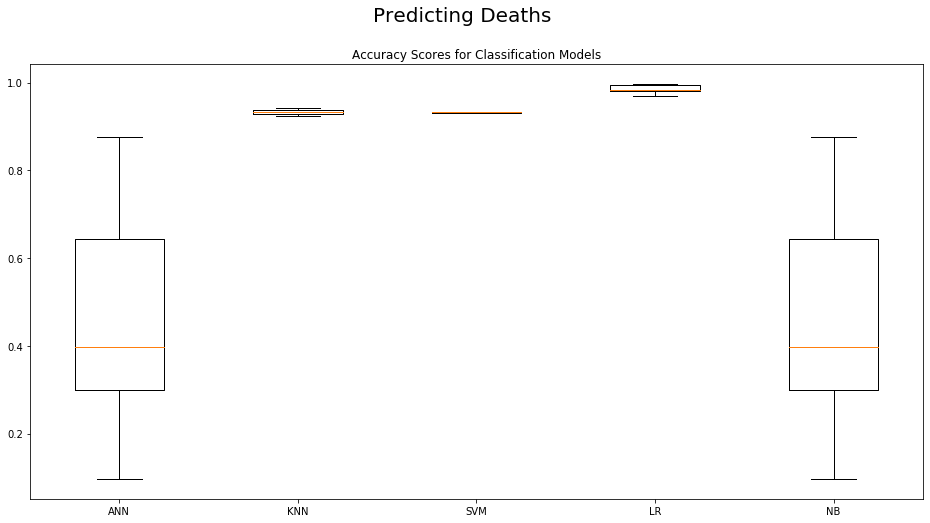

In [134]:
cv_test_scores = [
    cv_deceased_scores_ann["test_score"],
    cv_deceased_scores_kn["test_score"],
    cv_deceased_scores_svm["test_score"],
    cv_deceased_scores_lr["test_score"],
    cv_deceased_scores_nb["test_score"]
]

_ = plt.boxplot(cv_test_scores, labels=["ANN", "KNN", "SVM", "LR", "NB"])
fig = plt.gcf()
fig.set_size_inches(16,8)
plt.suptitle("Predicting Deaths", fontsize=20)
_ = plt.title("Accuracy Scores for Classification Models")

In [93]:
cv_deceased_scores_nb

{'fit_time': array([0.00299954, 0.0030005 , 0.0030005 , 0.00199866, 0.00200033]),
 'score_time': array([0.00099993, 0.00099969, 0.00100064, 0.00099945, 0.00099969]),
 'test_score': array([0.29876543, 0.39753086, 0.0962963 , 0.64356436, 0.87623762])}

In [103]:
cv_accuracy_means = [np.mean(l) for l in cv_test_scores]

In [144]:
cv_accuracy_means

[0.4624789145581225,
 0.9332697714215866,
 0.9322796724116857,
 0.9851729617406185,
 0.4624789145581225]

In [119]:
cv_accuracy_stds = [np.std(l) for l in cv_test_scores]

In [145]:
cv_accuracy_stds

[0.27169772549804155,
 0.006969506036385336,
 0.001157300084218942,
 0.0100016702186475,
 0.27169772549804155]

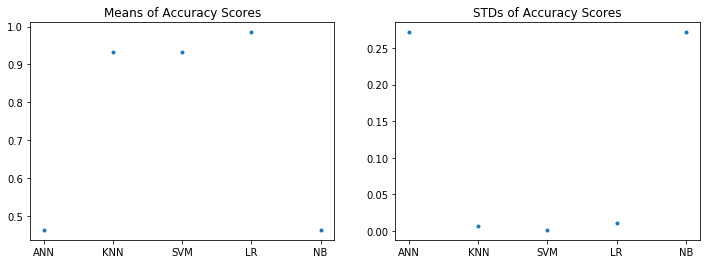

In [135]:
fig, ax = plt.subplots(1, 2)

ax[0].plot(
    np.arange(5), 
    cv_accuracy_means, 
    linestyle="none",
    marker="."
)
ax[0].set_title("Means of Accuracy Scores")
ax[0].set_xticks(np.arange(5))
ax[0].set_xticklabels(model_labels)

ax[1].plot(
    np.arange(5), 
    cv_accuracy_stds, 
    linestyle="none",
    marker="."
)
ax[1].set_title("STDs of Accuracy Scores")
ax[1].set_xticks(np.arange(5))
ax[1].set_xticklabels(model_labels)

fig = plt.gcf()
fig.set_size_inches(12,4)

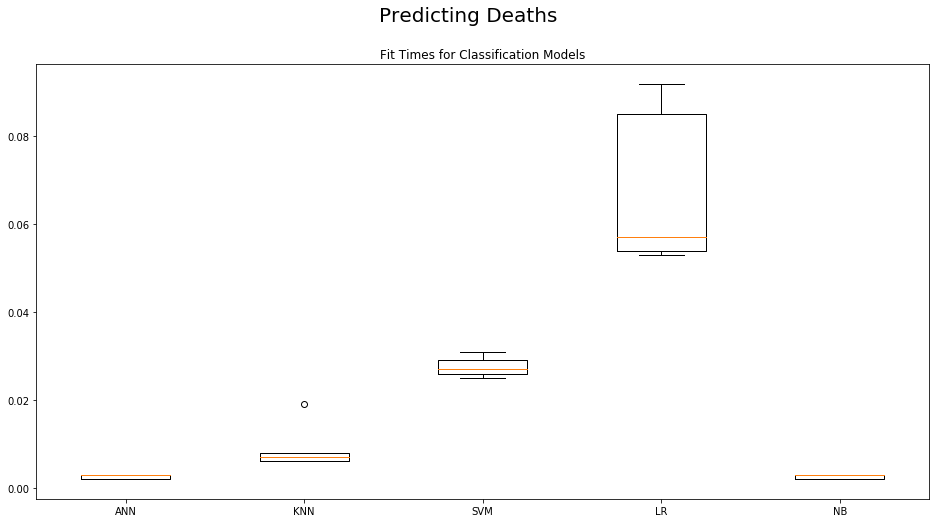

In [136]:
cv_test_scores = [
    cv_deceased_scores_ann["fit_time"],
    cv_deceased_scores_kn["fit_time"],
    cv_deceased_scores_svm["fit_time"],
    cv_deceased_scores_lr["fit_time"],
    cv_deceased_scores_nb["fit_time"]
]

_ = plt.boxplot(cv_test_scores, labels=["ANN", "KNN", "SVM", "LR", "NB"])
fig = plt.gcf()
fig.set_size_inches(16,8)
plt.suptitle("Predicting Deaths", fontsize=20)
_ = plt.title("Fit Times for Classification Models")


# Cross Validation Results - Deaths

Naive Bayes and Artificial Neural Network were not good predictors of deaths on symptoms.

Logistic Regression gives us the highest accuracy compared with other models.

Its standard deviation is nearly the same as KNN and SVM, which also gave us high accuracies.

The fit time for Logistic Regression is higher than our other models, but our primary concerns in predicting COVID deaths is accuracy.



## Predicting Deaths from Symptoms Using Logistic Regression

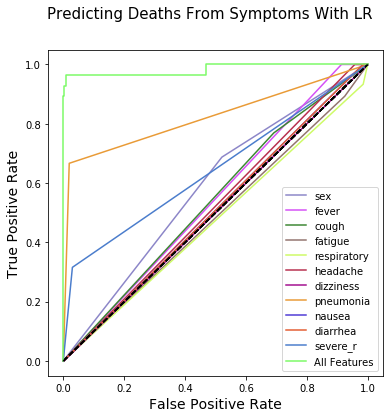

In [146]:
figs = []
predictorLabels = [
    "sex",
    "fever",
    "cough",
    "fatigue",
    "respiratory",
    "headache",
    "dizziness",
    "pneumonia",
    "nausea",
    "diarrhea",
    "severe_r" 
]

for label in predictorLabels:
    if label != "deceased":
        x = df_trimmed[label].values.reshape(-1,1)
        y = df_trimmed["deceased"].values
        figs.append(rocFromCol(lr, x, y, label))
        
figs.append(rocFromCol(lr, x_deceased_model, y_deceased_truevals, "All Features"))
plt.suptitle("Predicting Deaths From Symptoms With LR", fontsize=15)
plt.show()

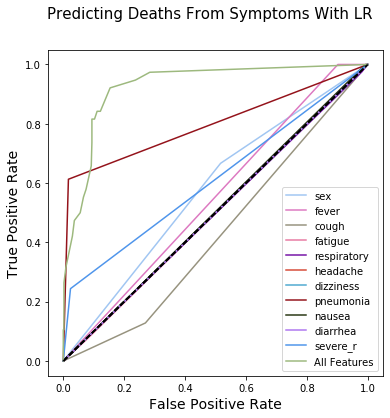

In [143]:
figs = []
predictorLabels = [
    "sex",
    "fever",
    "cough",
    "fatigue",
    "respiratory",
    "headache",
    "dizziness",
    "pneumonia",
    "nausea",
    "diarrhea",
    "severe_r" 
]

for label in predictorLabels:
    if label != "deceased":
        x = df_trimmed[label].values.reshape(-1,1)
        y = df_trimmed["deceased"].values
        figs.append(rocFromCol(kn, x, y, label))
        
figs.append(rocFromCol(kn, x_deceased_model, y_deceased_truevals, "All Features"))
plt.suptitle("Predicting Deaths From Symptoms With KN", fontsize=15)
plt.show()

In [210]:
def plotROCFromModelDeceased(model, x, y, title):
    figs = []
    predictorLabels = [
        "sex",
        "fever",
        "cough",
        "fatigue",
        "respiratory",
        "headache",
        "dizziness",
        "pneumonia",
        "nausea",
        "diarrhea",
        "severe_r" 
    ]

    for label in predictorLabels:
        if label != "deceased":
            X = df_trimmed[label].values.reshape(-1,1)
            Y = df_trimmed["deceased"].values
            figs.append(rocFromCol(model, X, Y, label))

    figs.append(rocFromCol(model, x, y, "All Features"))
    plt.suptitle(title, fontsize=15)
    
    return figs

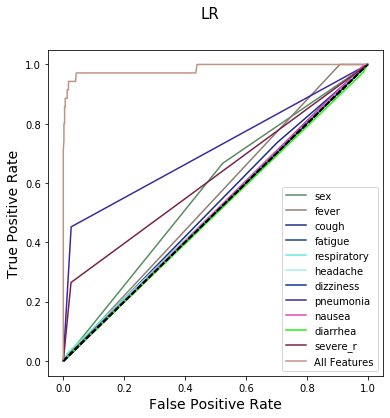

In [212]:
fig = plotROCFromModelDeceased(lr, x_deceased_model, y_deceased_truevals, "LR")

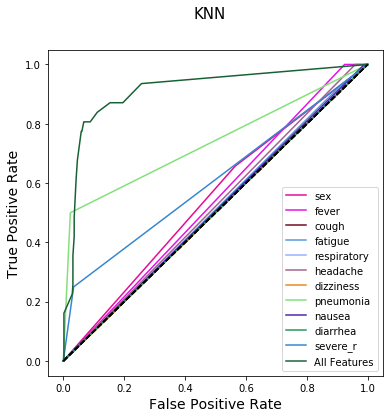

In [213]:
fig = plotROCFromModelDeceased(kn, x_deceased_model, y_deceased_truevals, "KNN")

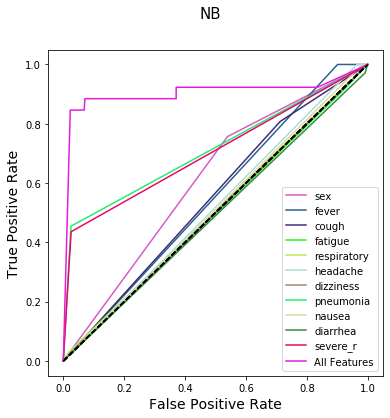

In [214]:
fig = plotROCFromModelDeceased(nb, x_deceased_model, y_deceased_truevals, "NB")

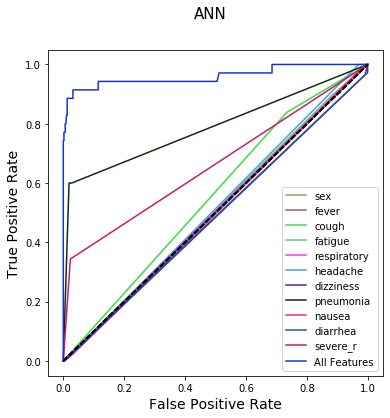

In [215]:
fig = plotROCFromModelDeceased(ann, x_deceased_model, y_deceased_truevals, "ANN")

# Predicting Hospitalizations from Symptoms

In [245]:
x_hospitalization_model = df_trimmed.drop("hospitalized", axis=1)
y_hospitalization_truevals = df_trimmed["hospitalized"]

In [246]:
cv_hosp_scores_ann = cross_validate(
    ann, 
    x_hospitalization_model, 
    y_hospitalization_truevals,
    cv=5, 
    scoring="accuracy"
)

In [247]:
cv_hosp_scores_kn = cross_validate(
    kn, 
    x_hospitalization_model, 
    y_hospitalization_truevals,
    cv=5, 
    scoring="accuracy"
)

In [248]:
cv_hosp_scores_svm = cross_validate(
    kn, 
    x_hospitalization_model, 
    y_hospitalization_truevals,
    cv=5, 
    scoring="accuracy"
)

In [249]:
cv_hosp_scores_lr = cross_validate(
    lr, 
    x_hospitalization_model, 
    y_hospitalization_truevals,
    cv=5, 
    scoring="accuracy"
)

In [250]:
cv_hosp_scores_nb = cross_validate(
    nb, 
    x_hospitalization_model, 
    y_hospitalization_truevals,
    cv=5, 
    scoring="accuracy"
)

In [251]:
cv_hosp_test_scores = [
    cv_hosp_scores_ann["test_score"],
    cv_hosp_scores_kn["test_score"],
    cv_hosp_scores_svm["test_score"],
    cv_hosp_scores_lr["test_score"],
    cv_hosp_scores_nb["test_score"]
]

In [252]:
cv_hosp_test_scores

[array([0.94814815, 0.98518519, 0.99753086, 0.9950495 , 0.9529703 ]),
 array([0.91851852, 0.91851852, 0.92345679, 0.91831683, 0.91336634]),
 array([0.91851852, 0.91851852, 0.92345679, 0.91831683, 0.91336634]),
 array([0.95061728, 0.98765432, 1.        , 0.9950495 , 0.9529703 ]),
 array([0.40246914, 0.93580247, 1.        , 0.85148515, 0.65594059])]

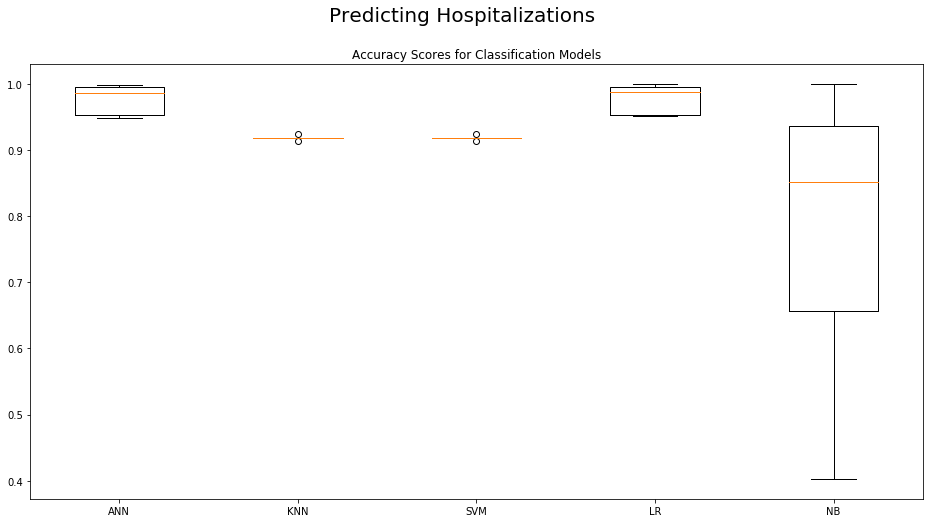

In [254]:
_ = plt.boxplot(cv_hosp_test_scores, labels=["ANN", "KNN", "SVM", "LR", "NB"])
fig = plt.gcf()
fig.set_size_inches(16,8)
plt.suptitle("Predicting Hospitalizations", fontsize=20)
_ = plt.title("Accuracy Scores for Classification Models")

In [257]:
cv_hosp_accuracy_means = [np.mean(l) for l in cv_hosp_test_scores]

In [261]:
cv_hosp_accuracy_means

[0.9757767999022124,
 0.9184353990954651,
 0.9184353990954651,
 0.9772582813836939,
 0.7691394695025058]

In [258]:
cv_hosp_accuracy_stds = [np.std(l) for l in cv_hosp_test_scores]

In [262]:
cv_hosp_accuracy_stds

[0.021055513092285105,
 0.0031917906574798773,
 0.0031917906574798773,
 0.021172812610908177,
 0.21684790515826324]

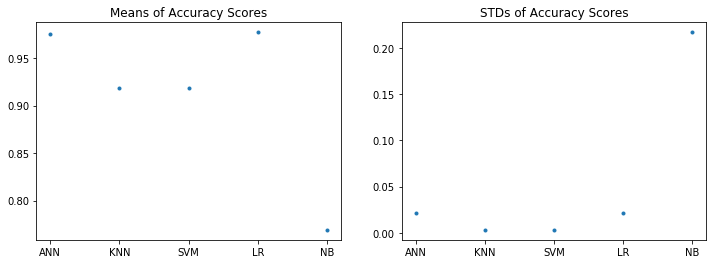

In [260]:
fig, ax = plt.subplots(1, 2)

ax[0].plot(
    np.arange(5), 
    cv_hosp_accuracy_means, 
    linestyle="none",
    marker="."
)
ax[0].set_title("Means of Accuracy Scores")
ax[0].set_xticks(np.arange(5))
ax[0].set_xticklabels(model_labels)

ax[1].plot(
    np.arange(5), 
    cv_hosp_accuracy_stds, 
    linestyle="none",
    marker="."
)
ax[1].set_title("STDs of Accuracy Scores")
ax[1].set_xticks(np.arange(5))
ax[1].set_xticklabels(model_labels)

fig = plt.gcf()
fig.set_size_inches(12,4)

# Predicting Hospitalizations with Logistic Regression